# Lista 4
## Metody numeryczne
### Magdalena Ryś

In [68]:
import numpy as np
import matplotlib.pyplot as plt

### Zadanie 1
Rozwiąż równanie
$$ \tg(π − x) − x = 0 $$
Na podstawie uzyskanych wyników wypełnij tabelę 1

In [69]:
def half(a: float, b: float, funct, eps=1e-20) -> float:

    """
    Function:
        funkcja rozwiązująca równanie nieliniowe metodą biekcji
    Input:
        a (float) - początek przedziału
        b (float) - koniec przedziału
        funct (function) - równanie
        eps (float) - dokładność
    Output:
        (float) - obliczony pierwiastek
        i (int) - liczba iteracji potrzebnych do obliczenia rozwiązania
        m (int) - liczba mnożeń i dodawań potrzebna do obliczenia rozwiązania
    """

    if funct(a) * funct(b) > 0:
        raise ValueError("Funkcja musi zmieniać znak w przedziale [a, b]")
    
    i = 0               
    m = 0                  

    if funct(a) == 0:
        return a, i, m
    if funct(b) == 0:
        return b, i, m

    while b - a > eps:
        i += 1
        s = (a + b) / 2
        m += 3

        if funct(s) == 0:
            return s, i, m
        
        if funct(a) * funct(s) < 0:
            m += 1
            b = s
        else:
            m += 1
            a = s

    return (a + b)/2, i, m+2

In [70]:
def brent_method(a: float, b: float, funct, eps=1e-20, max_iter = 10000) -> float:
    """
    Function:
        funkcja rozwiązująca równanie nieliniowe metodą Brenta
    Input:
        a (float) - początek przedziału
        b (float) - koniec przedziału
        funct (function) - równanie
        eps (float) - dokładność
        max_iter (int) - maksymalna liczba iteracji zabezpieczająca przed nieskończoną pętlą
    Output:
        (float) - obliczony pierwiastek
        i (int) - liczba iteracji potrzebnych do obliczenia rozwiązania
        m (int) - liczba mnożeń i dodawań potrzebna do obliczenia rozwiązania
    """
    m = 0 
    fa = funct(a)
    fb = funct(b)

    if fa * fb > 0:
        raise ValueError("Funkcja musi zmieniać znak w przedziale [a, b]")

    c = a
    fc = fa

    for i in range(max_iter):
        if fa != fc and fb != fc:
            s = (a * fb * fc / ((fa - fb) * (fa - fc)) +
                 b * fa * fc / ((fb - fa) * (fb - fc)) +
                 c * fa * fb / ((fc - fa) * (fc - fb)))
            m += 20
        else:
            s = b - fb * (b - a) / (fb - fa)
            m += 5

        if not ((3 * a + b) / 4 < s < b) or abs(s - b) >= abs(b - c) / 2:
            s = (a + b) / 2
            m += 7

        fs = funct(s)
        m += 1

        if abs(fs) < eps or abs(b - a) < eps:
            return s, i + 1, m

        if fa * fs < 0:
            b, fb = s, fs
        else:
            a, fa = s, fs

        c, fc = b, fb

    raise RuntimeError("Nie znaleziono rozwiązania w podanej liczbie iteracji")

In [71]:
def secant_method(a: float, b: float, funct, eps=1e-20) -> float:
    """
    Function:
        funkcja rozwiązująca równanie nieliniowe metodą siecznej
    Input:
        a (float) - początek przedziału
        b (float) - koniec przedziału
        funct (function) - równanie
        eps (float) - dokładność
    Output:
        (float) - obliczony pierwiastek
        i (int) - liczba iteracji potrzebnych do obliczenia rozwiązania
        m (int) - liczba mnożeń i dodawań potrzebna do obliczenia rozwiązania
    """
    i = 0
    m = 0
    fa = funct(a)
    fb = funct(b)
    
    while abs(b - a) > eps:
        i +=1
        x0 = a - fa * (a - b) / (fa - fb)
        m += 6
        f0 = funct(x0)

        if abs(f0) < eps:
            return x0, i, m

        b, fb = a, fa
        a, fa = x0, f0

    return x0, i, m

In [72]:
def derivative(func, x: float, h=1e-10):
    """
    Function:
        funkcja obliczająca pochodną równania
    Input:
        func (function) - równanie
        x (float) - punkt, w którym obliczamy pochodną
        h (float) - wartosc parametru h
    Output:
        (float) - przybliżona pochodna w punkcie
    """
    return (func(x + h) - func(x - h)) / (2 * h)

def newton_method(func, x0, eps=1e-20, max_iter=100):
    """
    Function:
        funkcja rozwiązująca równanie nieliniowe metodą siecznej
    Input:
        funct (function) - równanie
        x0 (float) - zgadywany wynik
        eps (float) - dokładność
    Output:
        (float) - obliczony pierwiastek
        i (int) - liczba iteracji potrzebnych do obliczenia rozwiązania
        m (int) - liczba mnożeń i dodawań potrzebna do obliczenia rozwiązania
    """
    m = 0
    x = x0

    for i in range(max_iter):

        fx = func(x)
        dfx = derivative(func, x)

        if np.abs(dfx) < eps:
            return None

        x_new = x - fx / dfx
        m += 2

        if abs(x_new - x) < eps:
            return x_new, i, m+1

        x = x_new

    raise RuntimeError("Nie znaleziono rozwiązania w podanej liczbie iteracji")

In [73]:
def funkcja1(x):
    return np.tan(np.pi - x) - x

e = 1e-15
a = -1.5
b = 0.5

x1, i1, m1 = half(a, b, funkcja1, e)
x2, i2, m2 = brent_method(a, b, funkcja1, e)
x3, i3, m3 = secant_method(a, b, funkcja1, e)
x4, i4, m4 = newton_method(funkcja1, a, e)

print(f"metoda bisekcji:   {x1},   f(x) = {funkcja1(x1)},   iteracje: {i1},   mnożenia i dodawania: {m1}")
print(f"metoda Brenta:     {x2},   f(x) = {funkcja1(x2)}, iteracje: {i2},   mnożenia i dodawania: {m2}")
print(f"metoda siecznych:  {x3},   f(x) = {funkcja1(x3)},  iteracje: {i3},    mnożenia i dodawania: {m3}")
print(f"Metoda Newtona:   {x4},   f(x) = {funkcja1(x4)},  iteracje: {i4},    mnożenia i dodawania: {m4}")

metoda bisekcji:   -4.440892098500626e-16,   f(x) = 7.657137397853899e-16,   iteracje: 51,   mnożenia i dodawania: 206
metoda Brenta:     2.0192326435568202e-17,   f(x) = -1.4265700635030352e-16, iteracje: 52,   mnożenia i dodawania: 669
metoda siecznych:  -9.326157583096396e-17,   f(x) = -2.920310408377136e-17,  iteracje: 6,    mnożenia i dodawania: 36
Metoda Newtona:   -1.1708490211017573e-16,   f(x) = -5.379777804559589e-18,  iteracje: 8,    mnożenia i dodawania: 19


. | bisekcja | m. Brenta | m. siecznych | m. Newtona
--- | --- | --- | --- | ---
`x` | -4.440892098500626e-16 | 2.0192326435568202e-17 | -9.326157583096396e-17 | -1.1708490211017573e-16
`f(x)` | 7.657137397853899e-16 | -1.4265700635030352e-16 | -2.920310408377136e-17 | -5.379777804559589e-18
liczba iteracji | 51 | 52 | 6 | 8
liczba mnożeń i dodawań | 206 | 669 | 36 | 19

### Zadanie 2

Sporządź wykres funkcji $f(x) = \cosh x \cos x−1$ w przedziale $4 \le x \le 8$. Na podstawie wykresu sprawdź, że najmniejszy dodatni pierwiastek równania
$f(x) = 0$ leży w przedziale $(4, 5)$, a następnie pokaż, że iteracyjny wzór Newtona nie doprowadzi do tego pierwiastka, jeśli punktem startowym będzie $x_0 = 4$.

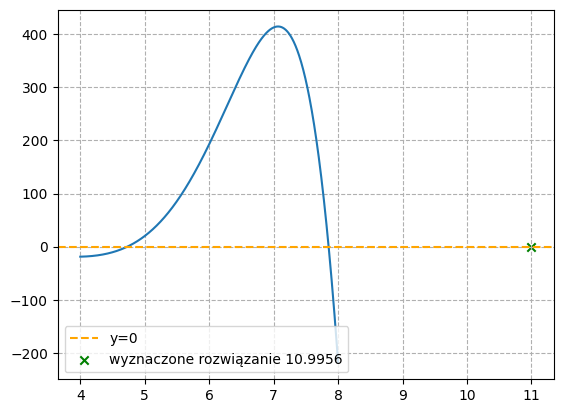

In [74]:
def function2(x):
    return np.cosh(x) * np.cos(x) - 1

ex2_range = np.linspace(4, 8, 1000)
ex2_result = round(newton_method(function2, 4)[0], 4)

plt.plot(ex2_range, function2(ex2_range))
plt.axhline(0, linestyle="--", color="orange", label="y=0")
plt.scatter(ex2_result, [0], marker="x", color="green", label=f"wyznaczone rozwiązanie {ex2_result}")
plt.grid(linestyle="--")
plt.legend()
plt.show()

### Zadanie 3
Prędkość v rakiety Saturn $V$ w locie pionowym tuż przy powierzchni Ziemi można przybliżyć wzorem 
$$v = u \ln \frac{M_0}{M_0 − \dot mt} − gt$$
gdzie
- $u = 2510 \ m/s$ - prędkość spalin względem rakiety,
- $M_0 = 2, 8 × 10^6 \ kg$ -masa rakiety w momencie oderwania od Ziemi,
- $\dot m = 13, 3 × 10^3 \ kg/s$ - szybkość zużycia paliwa,
- $g = 9, 81 \ m/s^2$ - przyspieszenie ziemskie,
- $t$ - czas mierzony od oderwania od Ziemi.

Wyznacz czas, po jakim rakieta osiągnie prędkość dźwięku $(335 m/s)$.

Szukamy rozwiązania następującego równania:

$$335 = u \ln \frac{M_0}{M_0 − \dot mt} − gt$$

Możemy je więc przekształcić do postaci funkcji:

$$f(t) = u \ln \frac{M_0}{M_0 − \dot mt} − gt - 335$$

a natępnie rozwiązać je poprzez znalezienie pierwiastka przy użyciu dowolnej metody.

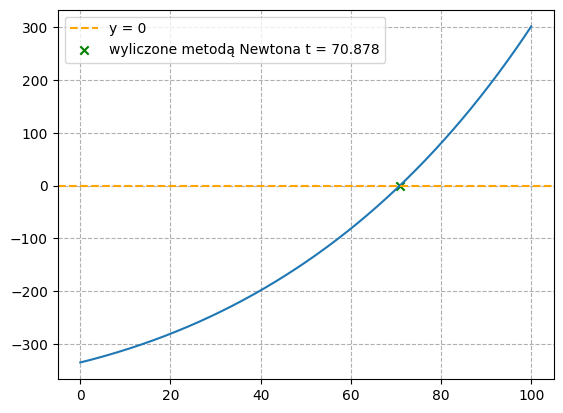

In [75]:
def function3(x, u = 2510, M0 = 2.8 * 10**6, m = 13.3 * 10**3, g = 9.81):
    return u * np.log(M0/(M0-m*x)) - g*x - 335

ex3_range = np.linspace(0, 100, 1000)
ex3_result = round(newton_method(function3, 50)[0], 4)

plt.plot(ex3_range, function3(ex3_range))
plt.axhline(0, linestyle="--", color="orange", label="y = 0")
plt.scatter(ex3_result, [0], marker="x", color="green", label=f"wyliczone metodą Newtona t = {ex3_result}")
plt.grid(linestyle="--")
plt.legend()
plt.show()

### Zadanie 4
Energia swobodna Gibbsa jednego mola wodoru w temperaturze $T$ wyraża się wzorem:

$$
G = -RT \ln \left( \frac{T}{T_0} \right)^{5/2}
$$

gdzie:
- $R = 8.31441 \, \text{J/K}$ to stała gazowa,
- $T_0 = 4.44418 \, \text{K}$.

Wyznacz temperaturę, w której $G = -105 \, \text{J}$.



Analogicznie do zadania 3, skoro szukamy rozwiązania równania

$$ -105 = -RT \ln \left( \frac{T}{T_0} \right)^{5/2} $$

to możemy sprowadzić je do postaci:

$$ 0 = -RT \ln \left( \frac{T}{T_0} \right)^{5/2} + 105 $$

C:\Users\user\AppData\Local\Temp\ipykernel_9248\628106856.py:2: RuntimeWarning: invalid value encountered in scalar power
  return - R*x*np.log(x/T0)**(5/2) + 105
C:\Users\user\AppData\Local\Temp\ipykernel_9248\628106856.py:2: RuntimeWarning: invalid value encountered in power
  return - R*x*np.log(x/T0)**(5/2) + 105


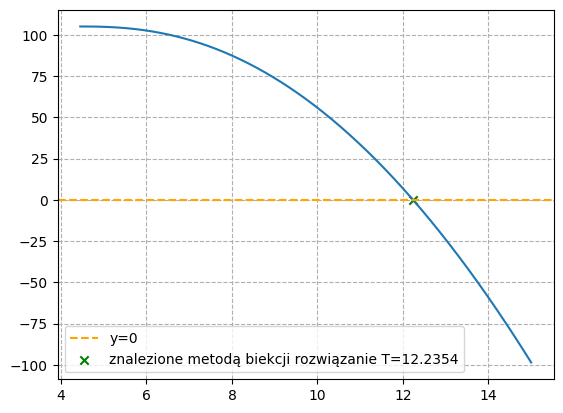

In [76]:
def function4(x, R = 8.31441, T0 = 4.44418):
    return - R*x*np.log(x/T0)**(5/2) + 105

ex4_range = np.linspace(4, 15, 1000)
ex4_result = round(half(4, 15, function4, 1e-10)[0], 4)

plt.plot(ex4_range, function4(ex4_range))
plt.axhline(0, linestyle="--", color="orange", label="y=0")
plt.scatter(ex4_result, [0], marker="x", color="green", label=f"znalezione metodą biekcji rozwiązanie T={ex4_result}")
plt.grid(linestyle="--")
plt.legend()
plt.show()

### Zadanie 5
Korzystając z dowolnej metody, wyznacz wszystkie rozwiązania rzeczywiste układu równań:

$$
\begin{cases} 
\tan(x) - y = 1, \\
\cos(x) - 3\sin(y) = 0,
\end{cases}
$$

w przedziale $ (0, 1.5) $


In [77]:
def find_all_roots(funct, a, b, eps=1e-15):
    """
    Function:
        funkcja znajdująca wszystkie pierwiastki za pomocą wielokrotnej metody bisekcji
    Input:
        funct (function) - równanie
        a (float) - początek przedziału
        b (float) - koniec przedziału
        eps (float) - dokładność
    Output:
        roots (list) - obliczone pierwiastki
    """
    roots = []
    x_values = np.arange(a, b, 1e-5)

    for i in range(len(x_values) - 1):
        x0, x1 = x_values[i], x_values[i + 1]

        if funct(x0) * funct(x1) < 0:
            root = half(x0, x1, funct, eps=eps)[0]

            if root is not None:
                if all(abs(root - r) > eps for r in roots):
                    roots.append(root)

    return roots

Aby rozwiązać podany układ równań doprowadzamy do postaci:

$$
\begin{cases} 
y = \tan(x) - 1, \\
\cos(x) - 3\sin(\tan(x) - 1) = 0,
\end{cases}
$$

I otrzymujemy równanie nieliniowe:

$$ \cos(x) - 3\sin(\tan(x) - 1) = 0 $$

x=[0.8816, 1.3294, 1.4352, 1.4749, 1.4973], y=[0.213613027156498, 3.0617853252045, 6.329576766258195, 9.395943034298012, 12.581614548220308]


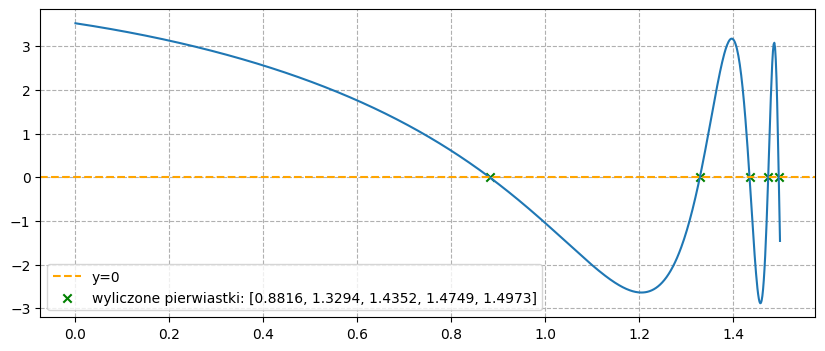

In [78]:
def function5(x):
    return np.cos(x) - 3*np.sin(np.tan(x) - 1)

ex5_range = np.linspace(0, 1.5, 1000)
ex5_results = [float(round(res, 4)) for res in find_all_roots(function5, 0, 1.5)]
y_ex5 = [float(np.tan(x) - 1) for x in ex5_results]
print(f"x={ex5_results}, y={y_ex5}")

plt.figure(figsize=(10, 4))
plt.plot(ex5_range, function5(ex5_range))
plt.axhline(0, linestyle="--", color="orange", label="y=0")
plt.scatter(ex5_results, np.zeros(len(ex5_results)), marker="x", color="green", label=f"wyliczone pierwiastki: {ex5_results}")
plt.grid(linestyle="--")
plt.legend()
plt.show()

### Zadanie 6
Znajdź wszystkie pierwiastki wielomianu:

$$
w(x) = x^4 + (5 + i)x^3 - (8 - 5i)x^2 + (30 - 14i)x - 84.
$$


In [79]:
def polynomial_roots(funct, guesses, eps = 1e-15):
    """
    Function:
        funkcja znajdująca wszystkie pierwiastki wielomianu za pomocą metody Newtona
    Input:
        funct (function) - równanie
        guesses (list) - zgadywane wyniki
        eps (float) - dokładność
    Output:
        roots (list) - obliczone pierwiastki
    """
    roots = []
    for guess in guesses:
        result = newton_method(funct, guess)
        if result:
            root = result[0]
            if not any(abs(root - r) < eps for r in roots):
                roots.append(root)
    
    return roots 

In [80]:
def function6(x):
    return x**4 + (5 + 1j)*x**3 - (8 - 5j)*x**2 + (30 - 14j)*x - 84

initial_guesses = [-8, -4, 4, 4j, -7j, -4j]
rounded_roots = []

for res in polynomial_roots(function6, initial_guesses):
    if abs(res.imag) < 1e-15: 
        rounded_roots.append(round(res.real, 4))
    else:
        rounded_roots.append(complex(round(res.real, 4), round(res.imag, 4)))

print("Pierwiastki wielomianu:", rounded_roots)


Pierwiastki wielomianu: [-7.0, 2.0, (-0+2j), -3j]
